## Reproducing Jordan's results on opiods with Marijuana Database

In [50]:
import pandas as pd

# read csv from github url
# return pandas dataframe
url = "https://raw.githubusercontent.com/prathikr/CAIS_Marijuana_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv"
df = pd.read_csv(url)
df.head(5)

,ID,female,nonwhite,unemplmt,primsev,B2a_0,State,City,zipcode,noins,...,Any_Cens,Alcohol_Cens,Binge_Cens,Marijuana_Cens,Illicit_Cens,Any_Days,Alcohol_Days,Binge_Days,Marijuana_Days,Illicit_Days
0,9048,0,0,0,4,17,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,192,192,192,192,192
1,9152,0,0,0,1,18,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,176,176,176,176,176
2,9057,0,0,1,3,16,VA,Lynchburg,24501-1114,0,...,0,0,2,0,2,21,21,365,81,365
3,9139,0,0,0,3,16,VA,Lynchburg,24501-1114,0,...,0,2,0,0,2,20,365,0,20,365
4,9051,0,1,0,3,17,VA,Lynchburg,24501-1114,0,...,0,0,0,0,1,14,30,30,14,356


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120659be0>]],
      dtype=object)

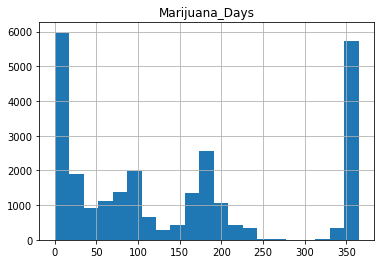

In [51]:
df = df[df.Marijuana_Days != -999] # removes all rows with Marijuana_Days = -999
df.hist(column='Marijuana_Days', bins=21) # 21 chosen so that there would be 3 bins between each x-axis number

In [52]:
# remove unnecessary features from dataset

print("Original df:", df.shape)

unused_potential_predictors = ['SFS8p_0', 'SFS8p_3', 'SFS8p_6', 'SFS8p_12', 'ada_0','ada_3',
'ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6','S2b1_12','S2z1_3','S2z1_6',
'S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6','S2z4_12','S2z5_3','S2z5_6',
'S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens','Any_Days','Binge_Days',
'Alcohol_Days','Illicit_Days']

domain_expert_cols_to_drop = ['SPSy_0', 'loc', 'AFSS_0', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e', 'E9e18', 'E9f', 'ID', 
'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'txtypeg', 'S7e4_0', 'engage42', 'POPIgrp','L5', 'E14a_0', 'E14b_0', 'SDScrY']

text_columns = ['City', 'agyaddr', 'zipcode', 'State']

cols_to_drop = text_columns + domain_expert_cols_to_drop + unused_potential_predictors

# drop columns and isolate to specific substance
df.drop(columns=cols_to_drop, inplace=True)
df = df[df.primsev == 3] # leaves only marijuana drug abusers in dataframe
df.drop(columns=['primsev'], inplace=True)
print("df Post-extracting predictor column and removing other predictors:", df.shape)
print("remaining columns: ", df.columns)

Original df: (26490, 110)
df Post-extracting predictor column and removing other predictors: (14166, 41)
remaining columns:  Index(['female', 'nonwhite', 'unemplmt', 'B2a_0', 'noins', 'prsatx', 'tottxp4',
       'TRI_0', 'GVS', 'tsd_0', 'und15', 'CWS_0', 'IPI', 'RFQ33c', 'GSSI_0',
       'S9y10', 'dldiag', 'press', 'DSS9_0', 'ADHDs_0', 'CDS_0', 'suicprbs_0',
       'CJSI_0', 'LRI7_0', 'SRI7_0', 'ERS21_0', 'homeless_0', 'S6', 'PSSI_0',
       'RERI13p_0', 'ncar', 'engage30', 'init', 'FIS4p_0', 'HIVrisk',
       'totttld', 'POS_0', 'S2x_0', 'SPSm_0', 'EPS7p_0', 'Marijuana_Days'],
      dtype='object')


In [53]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [54]:
# replace all -999 with NaN inplace
df.replace(to_replace = -999, value = np.nan, inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

display_side_by_side(missing_value_df, 3)

,column_name,percent_missing
female,female,0.000000
nonwhite,nonwhite,0.035296
unemplmt,unemplmt,0.197656
B2a_0,B2a_0,0.000000
noins,noins,59.819286
prsatx,prsatx,0.268248
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.221234
GVS,GVS,0.176479
tsd_0,tsd_0,0.232952


In [55]:
print("Original df:", df.shape)

# drop columns with > 25% NaNs
cols = []
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 25:
      cols.append(row['column_name'])
df.drop(columns=cols, inplace=True)
print("columns dropped:", cols)
print("new df shape:", df.shape)

Original df: (14166, 41)
columns dropped: ['noins', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'FIS4p_0']
new df shape: (14166, 34)


In [56]:
# paper mentions sorting was done by 1) level of care 2) gender 3) race 4) age
# level of care has been replaced with trauma scale
# age is not part of my current dataset (maybe ask Jordan for that data?)

df.sort_values(by=['GVS', 'female', 'nonwhite'], inplace=True)
df.head(10)

,female,nonwhite,unemplmt,B2a_0,prsatx,tottxp4,TRI_0,GVS,tsd_0,und15,...,ncar,engage30,init,HIVrisk,totttld,POS_0,S2x_0,SPSm_0,EPS7p_0,Marijuana_Days
3,0,0.0,0.0,16,0.0,14,0.0,0.0,0.0,1.0,...,1.0,0.0,1,4.0,980.0,0.0,5.0,0.0,12.698413,20
32,0,0.0,0.0,16,0.0,9,1.0,0.0,0.0,1.0,...,0.0,1.0,0,2.0,1101.0,0.0,0.0,3.0,15.079365,1
34,0,0.0,1.0,19,1.0,13,1.0,0.0,0.0,0.0,...,0.0,1.0,1,3.0,566.0,0.0,45.0,0.0,0.000000,365
54,0,0.0,0.0,15,0.0,13,0.0,0.0,0.0,1.0,...,1.0,1.0,1,1.0,874.0,0.0,0.0,4.0,4.761905,365
95,0,0.0,1.0,18,0.0,14,1.0,0.0,0.0,1.0,...,1.0,0.0,1,2.0,392.0,0.0,30.0,8.0,15.079365,15
113,0,0.0,0.0,14,1.0,9,1.0,0.0,0.0,1.0,...,1.0,1.0,1,4.0,557.0,4.0,6.0,9.0,19.047619,365
140,0,0.0,0.0,16,0.0,7,1.0,0.0,0.0,1.0,...,1.0,0.0,1,0.0,732.0,0.0,0.0,8.0,0.000000,3
148,0,0.0,0.0,16,0.0,13,2.0,0.0,0.0,1.0,...,1.0,1.0,1,3.0,365.0,4.0,51.0,0.0,11.904762,45
153,0,0.0,0.0,17,1.0,9,0.0,0.0,0.0,0.0,...,1.0,1.0,1,2.0,365.0,5.0,50.0,4.0,0.000000,196
191,0,0.0,1.0,25,1.0,12,0.0,0.0,0.0,0.0,...,1.0,1.0,1,3.0,337.0,0.0,1.0,1.0,0.000000,0


In [57]:
# replace with mode
# DEBUG: figure out how to replace by only looking at upper and lower 10 rows
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
"""for row_ind, row in df.iterrows(): 
    for item in row.iteritems():
        print(item)
        print(item[1])
        if pd.isnull(row[item[0]]):
            print(item)
            start = row_ind-10
            stop = row_ind+10
            if start < 0:
                start = 0
            if stop >= len(df):
                stop = len(df)
            print("Before", df.loc[row_ind, item[0]])
            print("Mode", df[start:stop][item[0]].mode())
            df[item[0]][row_ind] = df[start:stop][item[0]].mode()
            print("After", df.loc[row_ind, item[0]])"""

'for row_ind, row in df.iterrows(): \n    for item in row.iteritems():\n        print(item)\n        print(item[1])\n        if pd.isnull(row[item[0]]):\n            print(item)\n            start = row_ind-10\n            stop = row_ind+10\n            if start < 0:\n                start = 0\n            if stop >= len(df):\n                stop = len(df)\n            print("Before", df.loc[row_ind, item[0]])\n            print("Mode", df[start:stop][item[0]].mode())\n            df[item[0]][row_ind] = df[start:stop][item[0]].mode()\n            print("After", df.loc[row_ind, item[0]])'

In [58]:
# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

display_side_by_side(missing_value_df, 3)

,column_name,percent_missing
female,female,0.0
nonwhite,nonwhite,0.0
unemplmt,unemplmt,0.0
B2a_0,B2a_0,0.0
prsatx,prsatx,0.0
tottxp4,tottxp4,0.0
TRI_0,TRI_0,0.0
GVS,GVS,0.0
tsd_0,tsd_0,0.0
und15,und15,0.0


In [59]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

# keep only women!
df = df[df.female == 0]
# extract predictor
y = df.Marijuana_Days
df.drop(columns=['Marijuana_Days', 'female'], inplace=True)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train < 365, y_train.copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test < 365, y_test.copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(8981, 32) (8981,)
(2246, 32) (2246,)


In [60]:
from sksurv.linear_model import CoxnetSurvivalAnalysis

# l1_ratio = 1 adjusts model to implement LASSO method for penaties
# normalize = True means normalize all values as part of fitting
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit
# how to I implement the shrinkage factor??
rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, normalize=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=True, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [61]:
# display_side_by_side(dir(rcr), 6)

In [62]:
haz = rcr.predict_cumulative_hazard_function(X_test)

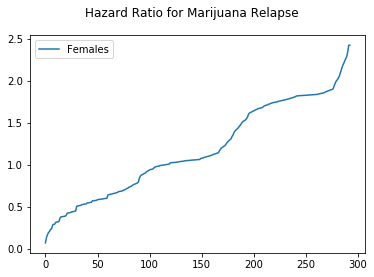

In [63]:
import matplotlib.pyplot as plt

plt.suptitle('Hazard Ratio for Marijuana Relapse')
plt.plot(np.mean([person.y for person in haz], axis=0), label="Females")
plt.legend()

In [64]:
rcr.score(X_test, y_test_censored)

0.5832599627114194